## **Analytical Questions - What is the overall economic health of Americans?**
1.  **How much liquidity do Americans have?**
2.	What does disposable income look like for Americans over time? What is the comparison between ‘poor’ and ‘wealthy' areas(s)/region(s). Can I normalize the overall dataset with this approach–maybe I can use an overlay of cities and towns, etc..?
3. **What are people’s spending habits? how are people spending over time, more or less?** 
4. Can I use this to help better understand trends like housing, food, healthcare spending, etc. What are Americans doing with their disposable income?
4.	 **Are Americans enjoying economic growth over time? Or are there economic decline in earnings?**
--------------------------------------------------------------------------------------------------------------------
- (JC): How does income correlate with specific components of the cost of living (e.g., housing affordability, food prices)? 
- (JC): Have certain components of the cost of living increased at a faster rate than income in some areas? 
- (JD): How did import/export volumes fluctuate monthly across major East Coast ports in 2024?
- (FL): **How are people spending over time, more or less?**
- (FL): **How much disposable income do Americans have over time?** 
- (FL): **What does the cost of living look like for North Americans?** 
- **Note:** I'll be using one or two of these question in my EDA. And the following questions below 




In [1]:
# Import necessary libraries
from scipy.stats import pearsonr # for correlation calculation
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations 

import seaborn as sns # for data visualization 
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as xticks # for axis formatting
import plotly.express as px # for interactive plots
import math # for mathematical operations not found in numpy or native python...

In [44]:
# Load datasets
us_econ = pd.read_csv("../data/US_Macro_Micro_Index.csv", parse_dates=['DATE'], index_col=0)
world_col = pd.read_csv("../data/Cost_of_Living_and_Income_Extended.csv", parse_dates=['Year'])


In [5]:
world_col.head()

,Country,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,Australia,2013-01-01,3483.92,1106.07,32.09,27.50,1.74,18.23,6.94,17.19,Oceania
1,India,2019-01-01,7771.03,5422.78,25.21,29.30,3.35,17.21,12.42,9.90,Asia
2,Russia,2004-01-01,6991.30,3972.36,40.85,22.94,15.48,15.28,7.10,9.59,Europe
3,South Africa,2011-01-01,6628.04,6755.75,30.38,15.69,8.03,6.66,11.76,11.04,Africa
4,Brazil,2015-01-01,2434.27,2656.36,49.27,12.44,25.06,9.34,3.63,15.09,South America


### Cost of Living Univariate Analysis 

In [8]:
world_col.describe()

,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage
count,500,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,2011-07-07 20:09:36,4291.248240,3716.23212,34.973700,22.400900,14.92708,12.381820,8.408440,12.475940
min,2000-01-01 00:00:00,534.740000,432.60000,20.100000,5.000000,0.00000,5.010000,2.000000,5.060000
25%,2005-01-01 00:00:00,2322.360000,1967.79000,27.235000,14.742500,7.52500,8.487500,5.285000,8.752500
50%,2012-01-01 00:00:00,4391.585000,3803.20500,35.170000,22.275000,14.95000,12.365000,8.245000,12.665000
75%,2018-01-01 00:00:00,6233.757500,5265.96750,42.567500,30.905000,22.42750,16.222500,11.595000,15.952500
max,2023-01-01 00:00:00,7984.510000,6996.13000,49.950000,39.920000,29.84000,19.990000,14.940000,19.970000
std,NaN,2179.217333,1922.16053,8.657032,10.025412,8.81321,4.269823,3.775455,4.219147


In [45]:
# Rename the mislabeled column to properly label 'Year' column 
# for a cleaner more descriptive labeling.
world_col.rename(columns={'Year': 'DATE'}, inplace=True)

# Extract useful components for 'DATE' column
world_col['YEAR'] = world_col['DATE'].dt.year
world_col['NUM_MONTH'] = world_col['DATE'].dt.month
world_col['MONTH'] = world_col['DATE'].dt.strftime('%b')

# Assign Quarter Labels to 'Quarters' Column
def month_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

world_col['QUARTER'] = world_col['NUM_MONTH'].apply(month_to_quarter)


In [46]:
world_col.head()

,Country,DATE,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region,YEAR,NUM_MONTH,MONTH,QUARTER
0,Australia,2013-01-01,3483.92,1106.07,32.09,27.50,1.74,18.23,6.94,17.19,Oceania,2013,1,Jan,Q1
1,India,2019-01-01,7771.03,5422.78,25.21,29.30,3.35,17.21,12.42,9.90,Asia,2019,1,Jan,Q1
2,Russia,2004-01-01,6991.30,3972.36,40.85,22.94,15.48,15.28,7.10,9.59,Europe,2004,1,Jan,Q1
3,South Africa,2011-01-01,6628.04,6755.75,30.38,15.69,8.03,6.66,11.76,11.04,Africa,2011,1,Jan,Q1
4,Brazil,2015-01-01,2434.27,2656.36,49.27,12.44,25.06,9.34,3.63,15.09,South America,2015,1,Jan,Q1


In [47]:
ucon_wcol_merge = us_econ.merge(world_col, on='QUARTER')

In [48]:
ucon_wcol_merge.head()

,DATE_x,YEAR_x,MONTH_x,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income,Country,...,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region,YEAR_y,NUM_MONTH,MONTH_y
0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1,Australia,...,32.09,27.50,1.74,18.23,6.94,17.19,Oceania,2013,1,Jan
1,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1,India,...,25.21,29.30,3.35,17.21,12.42,9.90,Asia,2019,1,Jan
2,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1,Russia,...,40.85,22.94,15.48,15.28,7.10,9.59,Europe,2004,1,Jan
3,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1,South Africa,...,30.38,15.69,8.03,6.66,11.76,11.04,Africa,2011,1,Jan
4,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1,Brazil,...,49.27,12.44,25.06,9.34,3.63,15.09,South America,2015,1,Jan


In [50]:
# Start by making a copy (good habit)
merged_clean = ucon_wcol_merge.copy()

# Drop unwanted duplicates
merged_clean.drop(columns=[
    'DATE_y',     # Keep only ..._x columns
    'YEAR_y',     
    'MONTH_y',    
    'NUM_MONTH'   
], inplace=True, errors='ignore')  # errors='ignore' avoids crash if not found


In [51]:
# Rename columns
merged_clean.rename(columns={
    'DATE_x': 'DATE',
    'YEAR_x': 'YEAR',
    'MONTH_x': 'MONTH'
}, inplace=True)

In [52]:
# Sort columns by DATE
merged_clean.sort_values('DATE', inplace=True)
merged_clean.reset_index(drop=True, inplace=True)

In [53]:
merged_clean.head()

,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income,Country,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1,Australia,3483.92,1106.07,32.09,27.50,1.74,18.23,6.94,17.19,Oceania
1,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1,Canada,7366.16,2006.98,20.65,29.07,2.05,6.07,5.86,7.94,North America
2,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1,Japan,4759.59,6327.00,47.00,21.69,12.14,10.78,13.64,18.45,Asia
3,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1,Russia,1854.32,4673.33,30.42,5.67,21.98,6.28,13.52,12.82,Europe
4,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1,Mexico,7439.36,449.91,32.33,37.42,10.02,19.07,5.38,11.11,North America


In [56]:
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28500 entries, 0 to 28499
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   DATE                                    28500 non-null  datetime64[ns]
 1   YEAR                                    28500 non-null  int64         
 2   MONTH                                   28500 non-null  int64         
 3   MONTH_NAME                              28500 non-null  object        
 4   QUARTER                                 28500 non-null  object        
 5   Disposable_Personal_Income_Nominal      28500 non-null  float64       
 6   Disposable_Personal_Income_Per_Capita   28500 non-null  int64         
 7   Real_Personal_Consumption_Expenditures  28500 non-null  float64       
 8   Total_Personal_Income                   28500 non-null  float64       
 9   Country                                 28500 non-

In [54]:
merged_clean.isna().sum()

DATE                                      0
YEAR                                      0
MONTH                                     0
MONTH_NAME                                0
QUARTER                                   0
Disposable_Personal_Income_Nominal        0
Disposable_Personal_Income_Per_Capita     0
Real_Personal_Consumption_Expenditures    0
Total_Personal_Income                     0
Country                                   0
Average_Monthly_Income                    0
Cost_of_Living                            0
Housing_Cost_Percentage                   0
Tax_Rate                                  0
Savings_Percentage                        0
Healthcare_Cost_Percentage                0
Education_Cost_Percentage                 0
Transportation_Cost_Percentage            0
Region                                    0
dtype: int64

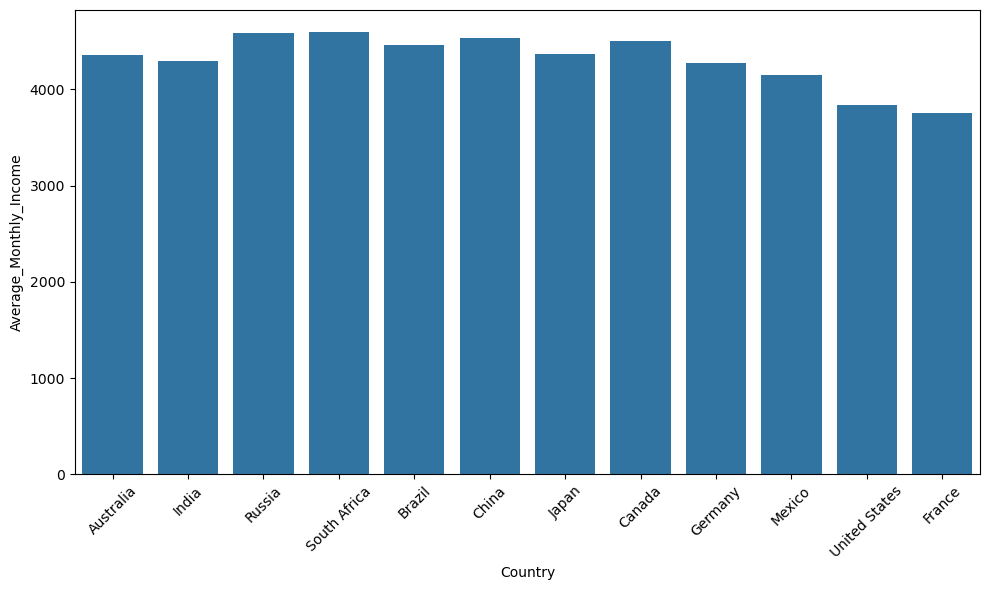

In [37]:
# Box plot of Countries vs. Average Monthly Income 
plt.figure(figsize=(10,6))
sns.barplot(data=world_col,x="Country", y="Average_Monthly_Income", errorbar=None)
plt.xticks(rotation=45)
plt.tight_layout()

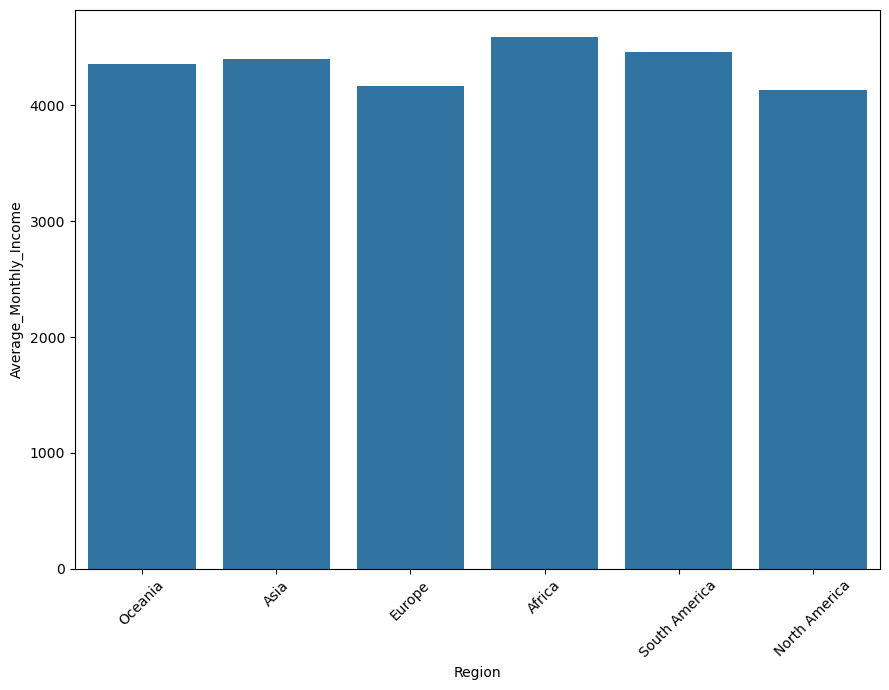

In [60]:
# Bar plot of Countries vs. Average Monthly Income 
plt.figure(figsize=(9,7))
sns.barplot(data=world_col,x="Region", y="Average_Monthly_Income", errorbar=None)
plt.xticks(rotation=45)
plt.tight_layout()

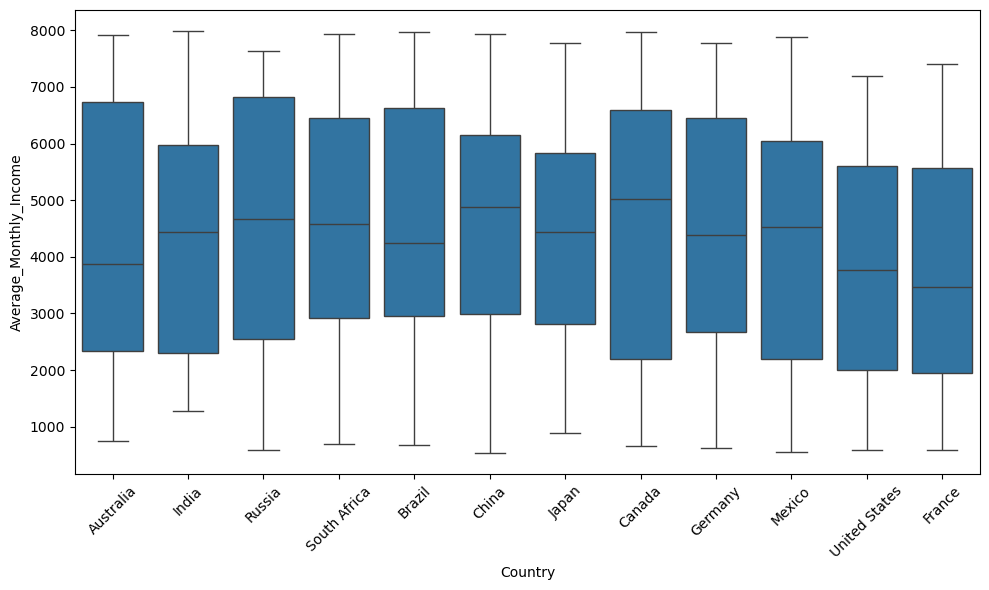

In [ ]:
# Box plot of Countries vs. Average Monthly Income 
plt.figure(figsize=(10,6))
sns.boxplot(data=world_col,x="Country", y="Average_Monthly_Income")
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
region_income = world_col.groupby('Region')['Monthly_Income'].reset_index()


### U.S Income Univariate Analysis

In [40]:
# US Economy EDA:
us_econ.describe() 

,DATE,YEAR,MONTH,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
count,219,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2016-01-31 02:50:57.534246656,2015.630137,6.438356,14772.744749,44706.808219,13050.686301,16795.313699
min,2007-01-01 00:00:00,2007.000000,1.000000,10200.400000,39579.000000,11068.000000,11647.100000
25%,2011-07-16 12:00:00,2011.000000,3.000000,11917.350000,40812.500000,11538.800000,13388.050000
50%,2016-02-01 00:00:00,2016.000000,6.000000,13773.800000,43487.000000,12777.300000,15695.900000
75%,2020-08-16 12:00:00,2020.000000,9.000000,17577.750000,48418.500000,14073.000000,19812.400000
max,2025-03-01 00:00:00,2025.000000,12.000000,22361.700000,61570.000000,16427.300000,25537.800000
std,NaN,5.281542,3.477264,3505.535636,4349.818062,1622.176393,4090.909736


In [39]:
us_econ.head()

,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7


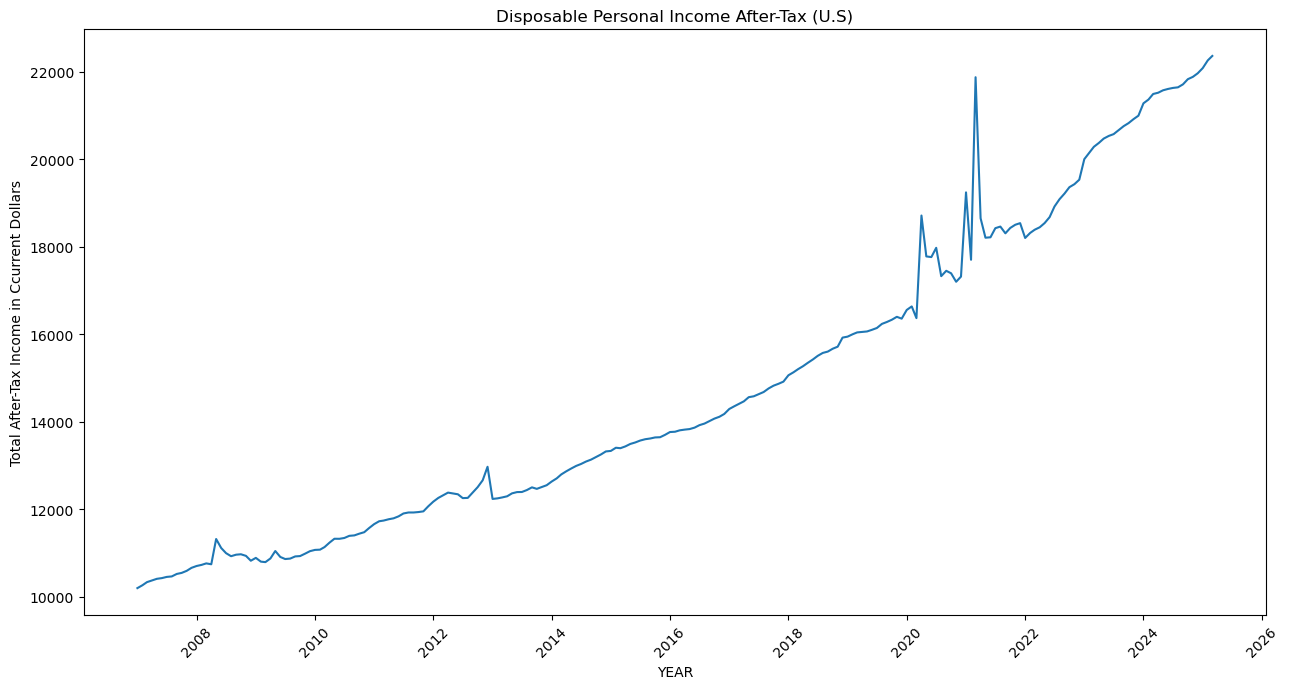

In [ ]:
# Line Plot
plt.figure(figsize=(13,7))
sns.lineplot(data=us_econ,x="DATE", y="Disposable_Personal_Income_Nominal", errorbar=None)
plt.title("Disposable Personal Income After-Tax (U.S)")
plt.xlabel("YEAR")
plt.ylabel("Total After-Tax Income in Ccurrent Dollars")
plt.xticks(rotation=45)
plt.tight_layout()

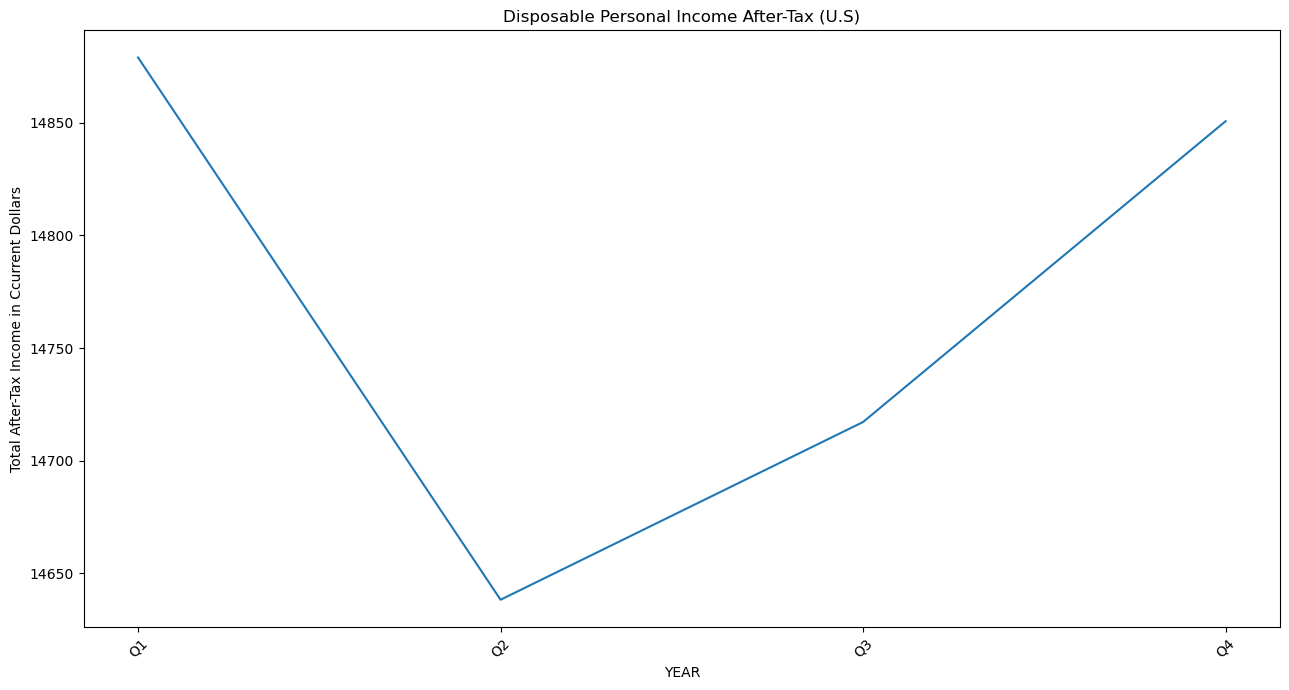

In [ ]:
# Line plot
plt.figure(figsize=(13,7))
sns.lineplot(data=us_econ,x="QUARTER", y="Disposable_Personal_Income_Nominal", errorbar=None)
plt.title("Disposable Personal Income After-Tax (U.S)")
plt.xlabel("YEAR")
plt.ylabel("Total After-Tax Income in Ccurrent Dollars")
plt.xticks(rotation=45)
plt.tight_layout()
## need to groupby quarter and region...